# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

[Jump to the section to load data generated (data augmentation)](#StartReusingGeneratedData)

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# Read classes and text labels
labels = np.genfromtxt('signnames.csv', delimiter=',', dtype=None, skip_header=True)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(labels)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

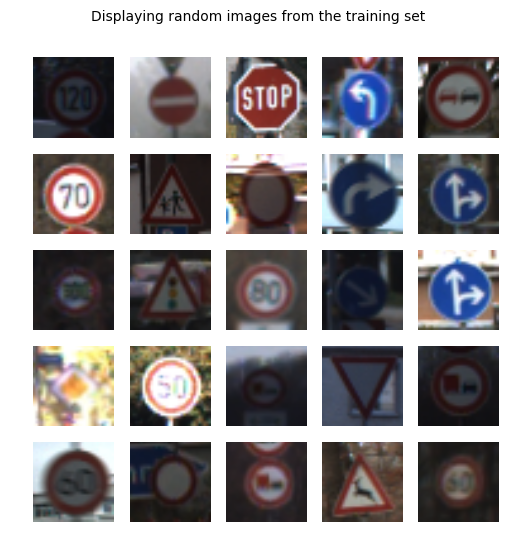

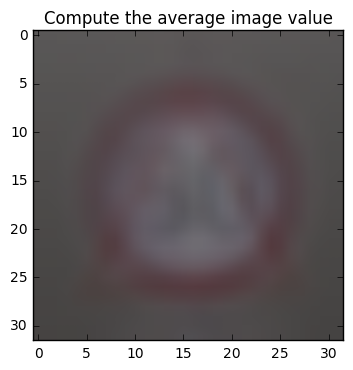

Compute the average pixel value:  82.665052346


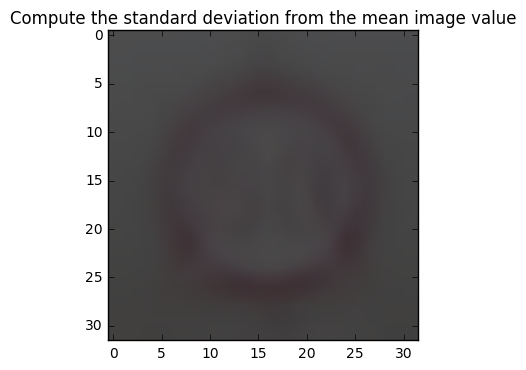

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Displaying random images from the training set
plt.figure(figsize=(6,6))
plot_number = 0
number_subplots = 5
random_im_idx = np.random.randint(n_train, size=number_subplots*number_subplots)
for plot_number in range(number_subplots*number_subplots):
    plt.subplot(number_subplots, number_subplots, plot_number + 1)
    image = X_train[random_im_idx[plot_number]]
    plt.imshow(image)
    plt.axis('off')
plt.suptitle('Displaying random images from the training set')
plt.show()

# Compute the average pixel value
mean_img = np.mean(X_train,axis=0)
plt.imshow(mean_img.astype(np.uint8))
plt.title('Compute the average image value')
plt.show()

mean_pixel = np.mean(X_train)
print('Compute the average pixel value: ', mean_pixel)


# Compute the standard deviation on the pixel 
# value (brighter means greater variance)
std_img = np.std(X_train,axis=0)
plt.imshow((std_img).astype(np.uint8))
plt.title('Compute the standard deviation from the mean image value')
plt.show()

### Histogram for pixel value distribution for one image
Discovering data distribution on one randomly selected image.
This is to start creating some understanding of the type of images part of the training set.

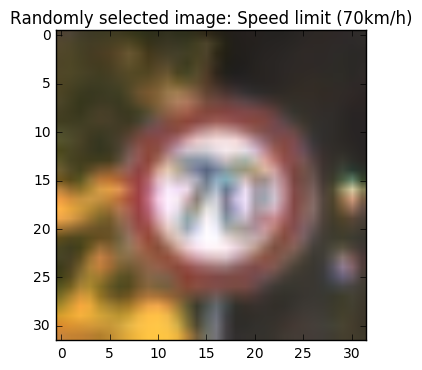

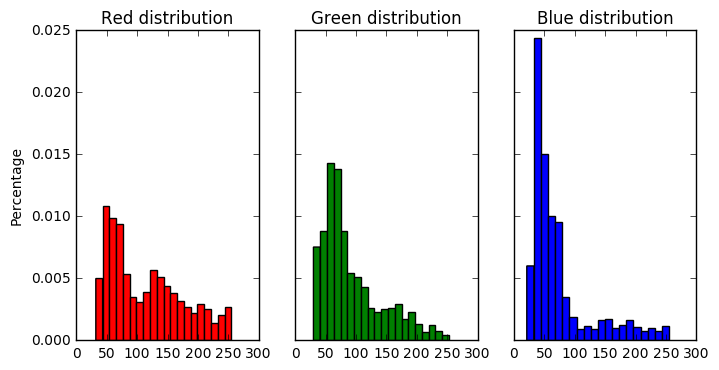

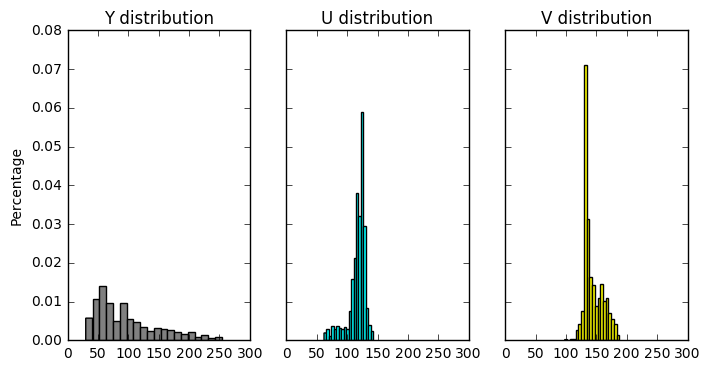

Exploring effect of biasing data values on image pixel values


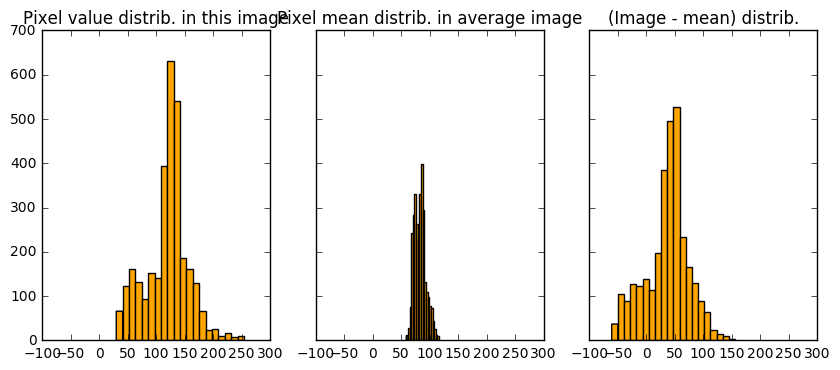

In [4]:
# Histogram for pixel value distribution for one image
# and comparing to statistical values (mean and std)
bins = 20
selected_img_idx = np.random.randint(n_train)
selected_img = X_train[selected_img_idx]
plt.imshow(selected_img)
label_name = labels[y_train[selected_img_idx]][1]
plt.title('Randomly selected image: {}'.format(label_name.decode('UTF-8')))
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(8, 4), sharey=True, sharex=True)
axs[0].hist((selected_img[:,:,0]).ravel(), bins, color='red',  normed=True)
axs[0].set_title('Red distribution')
axs[0].set_ylabel('Percentage')
axs[1].hist((selected_img[:,:,1]).ravel(), bins, color='green',  normed=True)
axs[1].set_title('Green distribution')
axs[2].hist((selected_img[:,:,2]).ravel(), bins, color='blue',  normed=True)
axs[2].set_title('Blue distribution')
plt.show()

# Exploring pixel distribution on YUV channels
import cv2
selected_img = cv2.cvtColor(selected_img, cv2.COLOR_BGR2YUV)
fig, axs = plt.subplots(1, 3, figsize=(8, 4), sharey=True, sharex=True)
axs[0].hist((selected_img[:,:,0]).ravel(), bins, color='gray',  normed=True)
axs[0].set_title('Y distribution')
axs[0].set_ylabel('Percentage')
axs[1].hist((selected_img[:,:,1]).ravel(), bins, color='cyan',  normed=True)
axs[1].set_title('U distribution')
axs[2].hist((selected_img[:,:,2]).ravel(), bins, color='yellow',  normed=True)
axs[2].set_title('V distribution')
plt.show()

print('Exploring effect of biasing data values on image pixel values')
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)
axs[0].hist((selected_img).ravel(), bins, color='orange')
axs[0].set_title('Pixel value distrib. in this image')
axs[1].hist((mean_img).ravel(), bins , color='orange')
axs[1].set_title('Pixel mean distrib. in average image')
axs[2].hist((selected_img - mean_img).ravel(), bins, color='orange')
axs[2].set_title('(Image - mean) distrib.')
plt.show()

### What is the distribution of the data (per label)

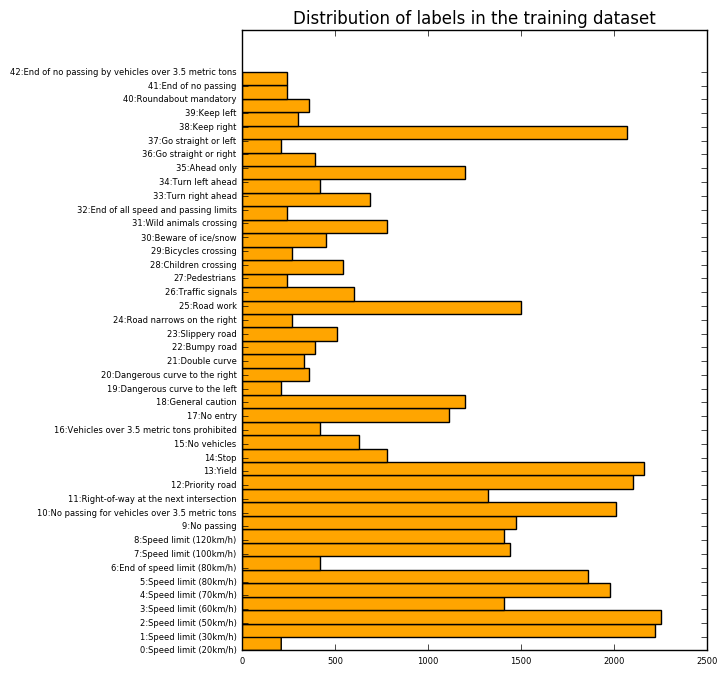

In [5]:
#What is the distribution of the data in the training file (per label)
hist_xticks = ['{}:{}'.format(t[0],t[1].decode('UTF-8')) for t in labels]
#print(hist_xticks)

fig = plt.figure(figsize=(6,8))

ax = plt.subplot() # Defines ax variable by creating an empty plot

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(6) # Size here overrides font_prop
    
plt.hist(y_train, bins=len(labels), orientation="horizontal", color='orange')
plt.yticks( np.arange(len(labels)), hist_xticks,  rotation=0)
plt.title('Distribution of labels in the training dataset')
plt.show()

We can see have a severe *data imbalance*. We need to correct by equalising the classes in the training set. Otherwise our loss function will return a good training accuracy even though we fail to classify the low frequency classes.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

Let's explore some statistical distributions in the dataset.

(39209, 32, 32, 3)
(12630, 32, 32, 3)


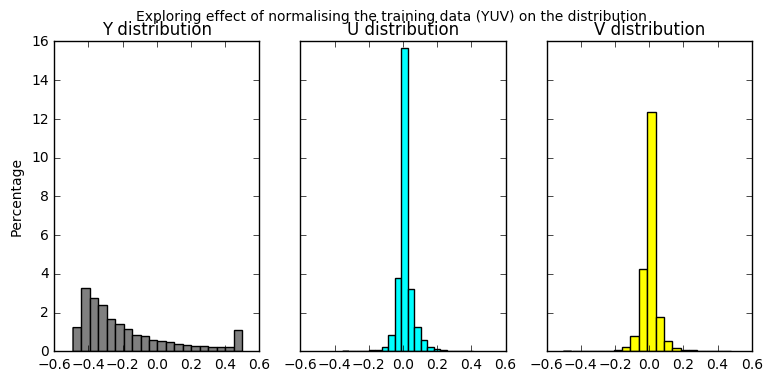

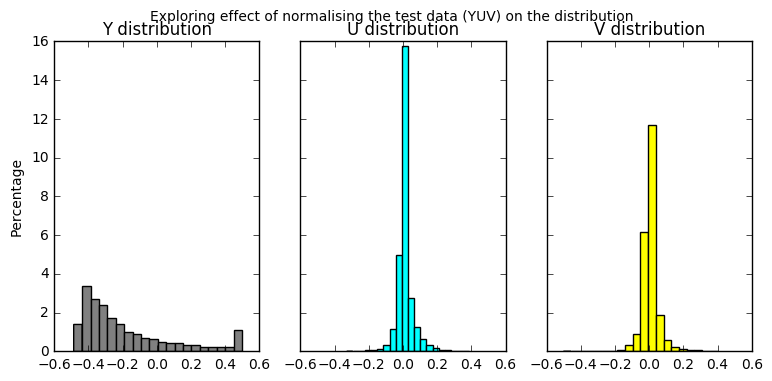

In [7]:
X_train_yuv = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2YUV) for image in X_train])
X_test_yuv =  np.array([cv2.cvtColor(image, cv2.COLOR_RGB2YUV) for image in X_test])
X_train_norm = np.float32((np.float32(X_train_yuv)-128.)/255.0)
X_test_norm = np.float32((np.float32(X_test_yuv)-128.)/255.0)

fig, axs = plt.subplots(1, 3, figsize=(9, 4), sharey=True, sharex=True)
axs[0].set_ylabel('Percentage')
axs[0].hist((X_train_norm[:,:,:,0]).ravel(), bins, color='gray',  normed=True)
axs[0].set_title('Y distribution')
axs[1].hist((X_train_norm[:,:,:,1]).ravel(), bins, color='cyan',  normed=True)
axs[1].set_title('U distribution')
axs[2].hist((X_train_norm[:,:,:,2]).ravel(), bins, color='yellow',  normed=True)
axs[2].set_title('V distribution')
plt.suptitle('Exploring effect of normalising the training data (YUV) on the distribution')
print(X_train_norm.shape)

fig, axs = plt.subplots(1, 3, figsize=(9, 4), sharey=True, sharex=True)
axs[0].set_ylabel('Percentage')
axs[0].hist((X_test_norm[:,:,:,0]).ravel(), bins, color='gray',  normed=True)
axs[0].set_title('Y distribution')
axs[1].hist((X_test_norm[:,:,:,1]).ravel(), bins, color='cyan',  normed=True)
axs[1].set_title('U distribution')
axs[2].hist((X_test_norm[:,:,:,2]).ravel(), bins, color='yellow',  normed=True)
axs[2].set_title('V distribution')
plt.suptitle('Exploring effect of normalising the test data (YUV) on the distribution')
print(X_test_norm.shape)

plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
In his paper "Traffic Sign Recognition with Multi-Scale Convolutional Networks", Yann Lecun is suggesting using the YUV colorspace and has actually achieved a higher recognition rate with the Y channel only.

In line with his result, I have converted the images *from RGB to YUV*.
I have also normalised the input data in order to improve the weights initialization using the maximum values possible on YUV : 255 and 0. I also recentred the data values around 128.
This normalisation scheme is adequate for image because it is simple and the data is bounded.

It is midly insteresting to see how well the data seems to fits a normal distribution on the U and V channels as opposed to the YUV channel. This is the case on both datasets. Before jumping to statistical conclusions, let's just remember that on one example (in the previous section) we have seen that the U and V channels presented a bell-shaped statistical distribution where the average is not zero.

Rather than building a complex preprocessing pipeline (i.e. histogram equalization), my aim for this project would like experiment with an architecture that would be robust enough to handle changes in brightness.


In [8]:
### Generate data additional data (OPTIONAL!)


##### Data augmentation
The main idea behing "data augmentation" is to generate additional images in order to balance, increase the variety of the training items in the training in order to improve the test score.


I implemented a data augmentation procedure that performs the geometric and colorspace transformation on images.


In [9]:
# generateImage : This function will be used to augment the dataset
import math

def generateTransformedImage(image_in):
    """
    image_in: image input (expected to be normalised between -1 and 1)
    image:    image output generated after geometric transformations
              the image output is also normalised
    """
    image = np.copy(image_in)
    rows,cols = image.shape[0:2]

    # Rotation Matrix
    import random
    rotation_angle = random.uniform(-10, 10)  
    zoom_ratio = 1 #random.uniform(.95, 1.05)  
    rotation_Mat = cv2.getRotationMatrix2D((cols/2,rows/2),
                                           rotation_angle,zoom_ratio)
    rotation_Mat = np.vstack((rotation_Mat,np.array([0,0,1.])))
    
    # Translation Matrix
    # Get random numbers for translation values
    random_translations = np.random.uniform(-2, 2, 2).astype('float32')
    tx = random_translations[0]
    ty = random_translations[1]
    translation_Mat = np.float32([[1, 0, tx],[0, 1, ty],[0, 0, 1]])
    M = np.matmul(rotation_Mat,translation_Mat)
    
    # Apply composition of rotation and translation to image to get an affine transformation
    image = cv2.warpAffine(image, M[0:2,:] ,(cols,rows))

    # Perspective transfomation ( we applied an affine transformation to get a correlated rotation and translation first)
    pts1 = np.float32([[1,1],[28,1],[1,28],[28,28]])
    random_deltas = np.random.uniform(-2, 2, 8).astype('float32')
    pts2 = pts1 + random_deltas.reshape(4,2)
    M = cv2.getPerspectiveTransform(pts1,pts2)
    image = cv2.warpPerspective(image,M,(cols,rows))

    # Random change in Brightness
    brightn_gain = random.uniform(0.7, 1.3)
    brightn_bias = random.uniform(-0.1, 0.1)*np.max(image[:,:,0])
    image[:,:,0] = np.clip(image[:,:,0]*brightn_gain+brightn_bias,-1,1)
    return image
    



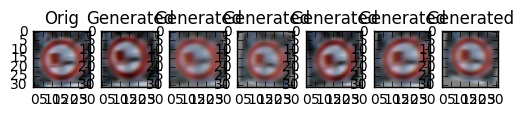

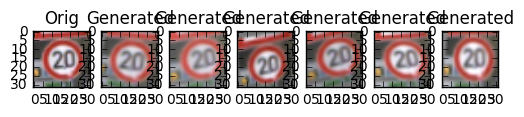

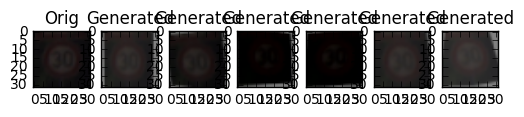

In [10]:
## Testing image generation function

def testingImageGenerator(image_in):
    # Apply transformation
    
    numberImagesPlot = 6
    fig, axs = plt.subplots(1, numberImagesPlot+1)

    axs[0].imshow(cv2.cvtColor(np.uint8(image_in*255+128), cv2.COLOR_YUV2RGB))
    axs[0].set_title('Orig')

#    imageList = list()
    for i in range(numberImagesPlot):
        image = generateTransformedImage(image_in)
        # Denormalize and put back to RGB for display
        image = cv2.cvtColor(np.uint8(np.clip(image*255+128, 0, 255)), cv2.COLOR_YUV2RGB)
#        imageList.append(image)
        
        axs[i+1].imshow(image)
        axs[i+1].set_title('Generated')

    plt.show()


# Load image
testingImageGenerator(X_train_norm[15566])
testingImageGenerator(X_train_norm[15])
testingImageGenerator(X_train_norm[581])

In [11]:
def generateAllImages(num_image_per_categ, X_train_norm, y_train, labels):
    """
    num_image_per_categ (input):  generate this number of images per category
    X_train_norm (input): Normalised vector of images to be used in training set
    y_train (input): Normalised vector of output label index to be used in training set
    labels (input): Dataset image labels (43 values indexed)
    (X_traingen_norm_list,y_traingen_list) (output): returns the normalised generated 
    """
    
    # We can see that the training set is not uniform 
    y_train_distrib, _ = np.histogram(y_train, bins=len(labels))
    print('Number of training images per label\n', y_train_distrib)



    # Let's see how many images we need to add per class
    num_to_generate = num_image_per_categ - y_train_distrib
    print('Number of images to generate per label:\n', num_to_generate)

    # Lets generate the addequate number of images in order to make the training set uniform

    y_traingen_list = list()
    X_traingen_norm_list = list()

    index = 0

    # For each label lets generate the required number of images per category
    for cat_idx in range(len(num_to_generate)):
        print('{}) generating {} images for: {}'.
              format(cat_idx, num_to_generate[cat_idx],
                     labels[cat_idx][1].decode('UTF-8')))

        for j in range(num_to_generate[cat_idx]):
            # For each image to be generated in category i
            # Get random image in set of labels
            y_train_sel_idx = np.where(y_train==cat_idx)
            X_train_norm_sel = X_train_norm[np.random.choice(y_train_sel_idx[0], 1)].reshape( X_train_norm.shape[1],
                                X_train_norm.shape[2], X_train_norm.shape[3])
            # Apply image transformation to create a new image, then reshape
            X_train_norm_sel = generateTransformedImage(X_train_norm_sel)
            X_traingen_norm_list.append(X_train_norm_sel)
            y_traingen_list.append(cat_idx) 
            index += 1

    print('Images generated : ', index)
    return X_traingen_norm_list, y_traingen_list

In [12]:
# We want to generate this number of images per category
NUM_IMAGES_PER_CATEG = 3000

X_traingen_norm_list, y_traingen_list = generateAllImages(NUM_IMAGES_PER_CATEG,
                                                          X_train_norm, y_train, labels)

Number of training images per label
 [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Number of images to generate per label:
 [2790  780  750 1590 1020 1140 2580 1560 1590 1530  990 1680  900  840 2220
 2370 2580 1890 1800 2790 2640 2670 2610 2490 2730 1500 2400 2760 2460 2730
 2550 2220 2760 2311 2580 1800 2610 2790  930 2700 2640 2760 2760]
0) generating 2790 images for: Speed limit (20km/h)
1) generating 780 images for: Speed limit (30km/h)
2) generating 750 images for: Speed limit (50km/h)
3) generating 1590 images for: Speed limit (60km/h)
4) generating 1020 images for: Speed limit (70km/h)
5) generating 1140 images for: Speed limit (80km/h)
6) generating 2580 images for: End of speed limit (80km/h)
7) generating 1560 images for: Speed limit (100km/h)
8) generating 1590 images for: Speed limit (120km/h)
9) genera

In [13]:
# Let's convert the lists of generated normalised YUV images to numpy arrays
X_traingen_norm = np.array(X_traingen_norm_list)
y_traingen = np.array(y_traingen_list)


# Combine generated images to original training set
print('Combining images in single dataset')
X_train_all_norm = np.concatenate((X_train_norm,X_traingen_norm), axis = 0)
y_train_all_gen = np.concatenate((y_train, y_traingen), axis=0 )

# Let's save the generated dataset in a new pickle file
print('Saving augmented data to file')
generated_training_set_norm_yuv = dict()
generated_training_set_norm_yuv['features'] = X_train_all_norm 
generated_training_set_norm_yuv['labels'] = y_train_all_gen 
pickle.dump( generated_training_set_norm_yuv, open( 'generated_training_set_norm_yuv.p', 'wb' ) )

print(X_train_all_norm.shape)
print(y_train_all_gen.shape)


# Delete previously loaded data
del X_train
del y_train
del X_traingen_norm_list
del y_traingen_list

Combining images in single dataset
Saving augmented data to file
(129000, 32, 32, 3)
(129000,)


<p id='StartReusingGeneratedData'> Jump Anchor </p>

### Let's make it possible to run the script from here
This cell enables the loading of the augmented data previously generated. 

In [14]:
# Load pickled data
import pickle
import numpy as np

# Set reloadData to true in order to reload the data 
reloadData = True

training_file = 'generated_training_set_norm_yuv.p'
testing_file = 'test.p'

if reloadData:
    
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    X_train_all_norm, y_train_all_gen = train['features'], train['labels']
    X_test, y_test = test['features'], test['labels']


    # Read classes and text labels
    labels = np.genfromtxt('signnames.csv', delimiter=',', dtype=None, skip_header=True)

In [15]:
# Normalize test set
import cv2
X_test_yuv =  np.array([cv2.cvtColor(image, cv2.COLOR_RGB2YUV) for image in X_test])
X_test = np.float32((np.float32(X_test_yuv)-128.)/255.0)
    
# Split the data into training  training/validation set


from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train_all_norm, y_train_all_gen,
                                                                test_size=0.20, random_state=42)


from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

print('Printing the shape of the training data')
print(X_train.shape, y_train.shape)

print('Unshuffled training data retrieved from file')
del X_train_all_norm
del y_train_all_gen
del train

Printing the shape of the training data
(103200, 32, 32, 3) (103200,)
Unshuffled training data retrieved from file


Displaying distribution from split augmented dataset 
(excluding the validation)


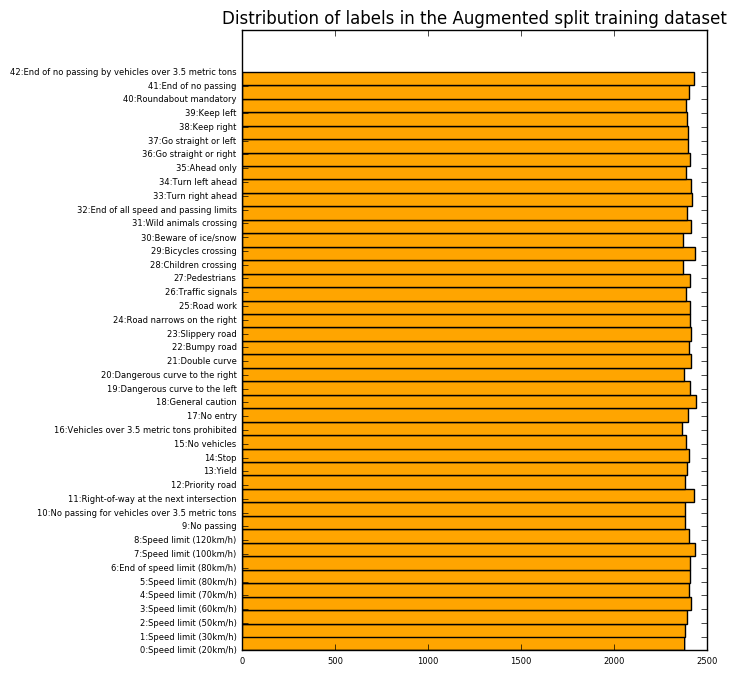

In [16]:
# Reloading matplotlib if it was previously shutdown
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


#What is the distribution of the data in the training file (per label)
hist_xticks = ['{}:{}'.format(t[0],t[1].decode('UTF-8')) for t in labels]

#print('Displaying distribution from final augmented dataset')
#fig = plt.figure(figsize=(6,8))
#ax = plt.subplot() # Defines ax variable by creating an empty plot

#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#    label.set_fontsize(6) # Size here overrides font_prop
    
#plt.hist(y_train_all_gen, bins=len(labels), orientation="horizontal", color='orange')
#plt.yticks( np.arange(len(labels)), hist_xticks,  rotation=0)
#plt.title('Distribution of labels in the Augmented dataset')
#plt.show()

print('Displaying distribution from split augmented dataset \n(excluding the validation)')
fig = plt.figure(figsize=(6,8))
ax = plt.subplot() # Defines ax variable by creating an empty plot
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(6) # Size here overrides font_prop
    
plt.hist(y_train, bins=len(labels), orientation="horizontal", color='orange')
plt.yticks( np.arange(len(labels)), hist_xticks,  rotation=0)
plt.title('Distribution of labels in the Augmented split training dataset')
plt.show()



69


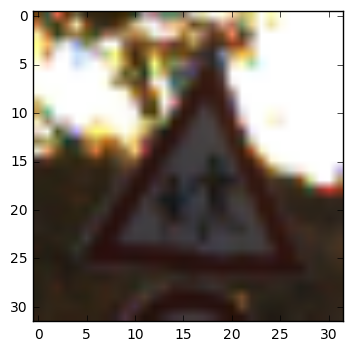

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

** Additional Data Generation ** :
As we observed from the inital dataset, some the categories were "imbalanced". Some traffic sign categories like the "20km/h speed limit" are under-represented. This could lead to a poor performance for the algorithm to be able to classify those categories.
So, I generated additional images to balance the different categories and also to provide a larger dataset for the training algorithm.


I implemented a data augmentation procedure that performs the following transformation on images:

- translation
- rotation
- perspective transform
- brightness modification

I generated a training set of 129000 images and 25800 validation images.
I choose to perform the augmentation on the ** normalized images ** in order to avoid black borders when rotating the images: the normalized representation naturally places average pixel color (grey) instead. I did the to avoid training the algorithm with border artifacts which would be to "far away" in value to the average value (see Step 1).  


** Training sets and Validation sets **
 
We need to make sure that we keep track of the accuracy of the Artificial Neural Network (ANN) performance on data that it has not been trained with. The gives us an estimation on how the ANN is able to generalize its learning. We call this dataset the validation dataset.

Finally, we keep a third dataset that we only use to calculate accuracy when we reach the end of the our training and ANN design cycle. 

As Andrew Ng explains (Source : http://www.computervisionblog.com/2016/12/nuts-and-bolts-of-building-deep.html ),
comparing the validation accuracy with the training accuracy helps us qualifing the performance of the ANN and take the appropriate next design step.

I choose to use 80% of the generated data (augmented data) a training set and the rest as the validation dataset.
The test set is the original test set provided by Udacity. I selected this dataset because it includes original (not transformed) images and would represent examples closer to images captured when driving. 




### Define your architecture here.
### Feel free to use as many code cells as needed.



As we will see, my initial ANN architecture, based on Yann Lecun's **LeNet**, was overfitting (difference between training error and validation error) despite providing more data and using dropout as a regularization technique.
I took the decision the decision to change the model architecture (see later).

I chose to experiment using a Leaky-ReLU rather instead of a pure ReLU in order to avoid the "vanishing gradients" issue.

In [17]:
import tensorflow as tf


# Calculate weights shape for a "VALID" padding convolution
import math


class MyNet():
    def __init__(self):
        self.weights = dict()
        self.biases = dict()

    def conv_weight_shape(in_height=28, filter_height=3, strides=1):
        out_height = math.ceil(float(in_height - filter_height + 1) / float(strides))
        return out_height

    # Creating reusable function for creating weights and naming them in the network
    def add_weights(self, name, shape, stddev=0.02):
        self.weights[name] = tf.Variable(tf.random_normal(shape, stddev=stddev), name=name)

    # Creating reusable function for creating weights and naming them in the network
    def add_bias(self, name, shape, mean=0.1, stddev=0.05):
        self.biases[name] = tf.Variable(tf.random_normal(shape, mean=mean, stddev=stddev), name=name)

    # Creating reusable function for creating convolutional layer
    # weights_dict is in the form {'weight_name1' : weights_values1, ...}
    def conv2d_raw(self, x, weights_name, bias_name, strides=1, padding='SAME'):
        x = tf.nn.conv2d(x, self.weights[weights_name], strides=[1, strides, strides,  1], padding=padding)
        x = tf.nn.bias_add(x, self.biases[bias_name])
        return x

    # Implementing general Conv block
    def conv2d(self, x, kernel=[1, 1], depth=32, strides=1, layer_name=None, padding='SAME'):
        """
        x: (input) the 2D input to the convolution
        kernel: (input) array containing the kernel size for the convolution
        depth: (input) scalar containing the depth size for the convolution
        strides: (input) scalar containing the strides size for the convolution
        layer_name: (input) string name for the convolution
        returns: convolution operation
        """
        # Convolutional Layer Input = N x M x in_channels.
        # Convolutional Layer Output = K x L x depth
        in_channels =  x.get_shape()[-1].value
        shape =  [kernel[0], kernel[1], in_channels, depth]
        
        # Xavier init
        num_inputs = np.prod(shape)
        sigma =  np.float32(math.sqrt(3./num_inputs))

        weight_name = 'w_{}'.format(layer_name)
        bias_name = "b_{}".format(layer_name)

        self.add_weights(weight_name, shape, stddev=sigma )
        self.add_bias(bias_name, [shape[-1]])
        output = self.conv2d_raw(x, weight_name, bias_name, strides, padding=padding)
        print('Layer out of ', layer_name ,'shape,', output.get_shape())
        return output
    
    def fully_connected(self, x, out_dim, layer_name=None):
        in_channels =  x.get_shape()[-1].value
        shape = [in_channels, out_dim]
        weight_name = 'w_{}'.format(layer_name)
        bias_name = "b_{}".format(layer_name)
        self.add_weights( weight_name, shape)
        self.add_bias(bias_name, [shape[-1]])
        return tf.matmul(x, self.weights[weight_name]) + self.biases[bias_name]


In [18]:

from tensorflow.contrib.layers import flatten

## Architecture for LeNet
class LeNet(MyNet):
    
    def __init__(self):    
        # Hyperparameters
        self.alpha = 1e-4
        super().__init__()
        
        
    def build(self, x, dropout):
        print('Let''s display the layers'' shape along the way')
        # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
        conv_layer1 = self.conv2d(x, kernel=[5, 5], depth=6, strides=1, layer_name='layer1', padding='VALID')
        print('Layer 1 shape:', conv_layer1.get_shape())

        # Activation.
        # layer1 = tf.nn.relu(conv_layer1)
        layer1 = tf.maximum(self.alpha*conv_layer1,conv_layer1)

        # Pooling. Input = 28x28x6. Output = 14x14x6.
        pool_strides = pool_filter_shape = [1, 2, 2, 1]
        padding = 'VALID'
        pooling_layer1 = tf.nn.max_pool(layer1, pool_filter_shape, pool_strides, padding)
        print('Pooling Layer 1 shape:', pooling_layer1.get_shape())

        # Layer 2: Convolutional. Output = 10x10x16.
        conv_layer2 = self.conv2d(pooling_layer1, kernel=[5, 5], depth=16, strides=1, layer_name='layer2', padding='VALID')

        # Activation.
        # layer2 = tf.nn.relu(conv_layer2)
        layer2 = tf.maximum(self.alpha*conv_layer2,conv_layer2)
        print('Layer 2 shape:', layer2.get_shape())

        # Pooling. Input = 10x10x16. Output = 5x5x16.
        pooling_layer2 = tf.nn.max_pool(layer2, pool_filter_shape, pool_strides, padding)

        # Flatten. Input = 5x5x16. Output = 400.
        flat_layer2 = tf.contrib.layers.flatten(pooling_layer2)

        # Layer 3: Fully Connected. Input = 400. Output = 120.
        full_layer3 = self.fully_connected(flat_layer2, 120, layer_name='layer_3')
        print('Layer 3 shape:', full_layer3.get_shape())

        # Activation
        # layer3 = tf.nn.relu(full_layer3)
        layer3 = tf.maximum(self.alpha*full_layer3,full_layer3)
        layer3 = tf.nn.dropout(layer3, dropout)

        # Layer 4: Fully Connected. Input = 120. Output = 84.
        full_layer4 = self.fully_connected(flat_layer2, 84, layer_name='layer_4')
        print('Layer 4 shape:', full_layer4.get_shape())

        # Activation
        #layer4 = tf.nn.relu(full_layer4)
        layer4 = tf.maximum(self.alpha*full_layer4,full_layer4)

        # Layer 5: Fully Connected. Input = 84. Output = 43.
        full_layer5 = self.fully_connected(layer4, 43, layer_name='layer_5')
        logits = full_layer5
        print('Logits shape:', logits.get_shape())

        return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)


lenet = LeNet()
logits = lenet.build(x, keep_prob)
label_index = tf.argmax(logits, axis=1, name='calculatedLabel', dimension=None)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)


rate = 0.004
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


Lets display the layers shape along the way
Layer out of  layer1 shape, (?, 28, 28, 6)
Layer 1 shape: (?, 28, 28, 6)
Pooling Layer 1 shape: (?, 14, 14, 6)
Layer out of  layer2 shape, (?, 10, 10, 16)
Layer 2 shape: (?, 10, 10, 16)
Layer 3 shape: (?, 120)
Layer 4 shape: (?, 84)
Logits shape: (?, 43)


#### Generate architecture inspired from LeNet

In [19]:
# Evaluate the Accuracy of the model

def evaluate(accuracy_operation, X_data, y_data, BATCH_SIZE):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        if is_training_val is None:
            feed_dict_val={x: batch_x, y: batch_y, keep_prob: 1.}
        else:
            feed_dict_val={x: batch_x, y: batch_y, is_training: False, keep_prob: 1.}
            
        accuracy = sess.run(accuracy_operation, feed_dict=feed_dict_val)
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [20]:

def train(netName, training_operation, accuracy_operation, 
          X_train, y_train, X_validation, y_validation,
          EPOCHS, BATCH_SIZE, dropout, is_training_val):
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        if is_training_val is None:
            sess.run(tf.global_variables_initializer())
        else:
            sess.run(tf.global_variables_initializer(), feed_dict={is_training: is_training_val}) # this works instead of above
        
        num_examples = len(X_train)
        validation_accuracy_values = list()
        training_accuracy_values = list()
        
        print("Training...")
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                if is_training_val is None:
                    sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
                else:
                    sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, is_training: is_training_val,
                                                        keep_prob: dropout})
                    
            training_accuracy = evaluate(accuracy_operation, X_train, y_train, BATCH_SIZE)
            validation_accuracy = evaluate(accuracy_operation, X_validation, y_validation, BATCH_SIZE)
            print("EPOCH {}: ".format(i+1), "Training Accuracy = {:.3f}, ".format(training_accuracy),
                  "Validation Accuracy = {:.3f}".format(validation_accuracy))
            validation_accuracy_values.append(validation_accuracy)
            training_accuracy_values.append(training_accuracy)

        saved_model = saver.save(sess, './' + netName)
        print("Model saved")
        return (saved_model, training_accuracy_values, validation_accuracy_values)
        

In [21]:
### Train your model here.
### Feel free to use as many code cells as needed.
dropout = 0.66  # Dropout, probability to keep units
EPOCHS = 100
BATCH_SIZE = 256


In [22]:
# Train the neural network
is_training_val = None
saved_model, lenet_training_accuracies, lenet_valid_accuracies = train('lenet.ckpt', training_operation, accuracy_operation,
                              X_train, y_train, X_validation, y_validation, EPOCHS, BATCH_SIZE, dropout, is_training_val)

Training...
EPOCH 1:  Training Accuracy = 0.640,  Validation Accuracy = 0.639
EPOCH 2:  Training Accuracy = 0.783,  Validation Accuracy = 0.775
EPOCH 3:  Training Accuracy = 0.866,  Validation Accuracy = 0.855
EPOCH 4:  Training Accuracy = 0.900,  Validation Accuracy = 0.891
EPOCH 5:  Training Accuracy = 0.914,  Validation Accuracy = 0.904
EPOCH 6:  Training Accuracy = 0.918,  Validation Accuracy = 0.905
EPOCH 7:  Training Accuracy = 0.936,  Validation Accuracy = 0.922
EPOCH 8:  Training Accuracy = 0.919,  Validation Accuracy = 0.907
EPOCH 9:  Training Accuracy = 0.940,  Validation Accuracy = 0.925
EPOCH 10:  Training Accuracy = 0.956,  Validation Accuracy = 0.941
EPOCH 11:  Training Accuracy = 0.954,  Validation Accuracy = 0.939
EPOCH 12:  Training Accuracy = 0.962,  Validation Accuracy = 0.948
EPOCH 13:  Training Accuracy = 0.964,  Validation Accuracy = 0.948
EPOCH 14:  Training Accuracy = 0.968,  Validation Accuracy = 0.950
EPOCH 15:  Training Accuracy = 0.958,  Validation Accuracy 

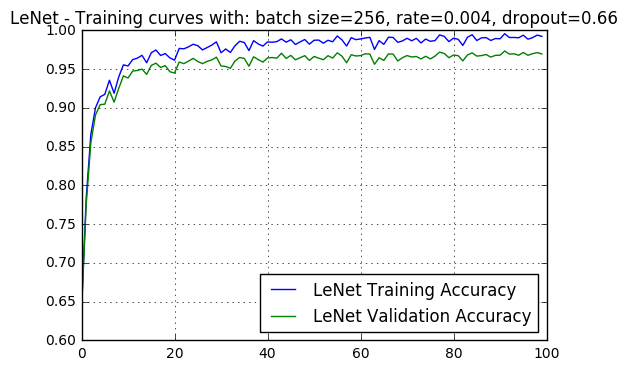

In [23]:
plt.plot(lenet_training_accuracies,label='LeNet Training Accuracy')
plt.plot(lenet_valid_accuracies,label='LeNet Validation Accuracy')
plt.legend(loc='lower right')
plt.title( 'LeNet - Training curves with: batch size={}, rate={}, dropout={}'.format(BATCH_SIZE, rate, dropout) )
plt.grid(True)
plt.show()

In [24]:
# Evaluate the model
with tf.Session() as sess:
    dropout = 1
    saver = tf.train.Saver()
    saver.restore(sess, saved_model)

    test_accuracy = evaluate(accuracy_operation, X_test, y_test, BATCH_SIZE)
    print("Test Accuracy = {:.1f}% on {} examples".format(test_accuracy*100,len(y_test)))


Test Accuracy = 91.3% on 12630 examples


#### Running the classification with random images from test dataset 

Trying with some random images
Label: Road work
Classified as: Road work


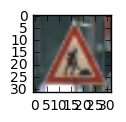

Label: Yield
Classified as: Yield


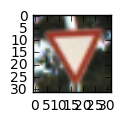

Label: End of speed limit (80km/h)
Classified as: End of speed limit (80km/h)


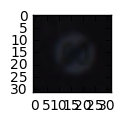

In [25]:
import random

print('Trying with some random images')

with tf.Session() as sess:
    dropout = 1
    saver = tf.train.Saver()
    saver.restore(sess, saved_model)
    for i in range(3):
        index = random.randint(0, len(X_test))
        print('Label:', labels[y_test[index]][1].decode('UTF-8'))
        image = X_test[index].squeeze()
        idx = sess.run(label_index, feed_dict={x: image.reshape(1, 32,32,3) ,  keep_prob: dropout} )
        print('Classified as:',  labels[idx][0][1].decode('UTF-8'))
        image = cv2.cvtColor(np.uint8(np.clip(image*255+128, 0, 255)),
                             cv2.COLOR_YUV2RGB)
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        plt.show()

In [26]:
# Evaluate the classifier output on many values of the model

def classifier(tf_session, classify_operation, X_data, y_data, BATCH_SIZE, is_training_val):
    num_examples = len(X_data)
    y_pred = np.empty(0)
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]

        if is_training_val is None:
            feed_dict_val={x: batch_x, y: batch_y, keep_prob: 1.}
        else:
            feed_dict_val={x: batch_x, y: batch_y, is_training: False, keep_prob: 1.}
            
        idx = tf_session.run(classify_operation, feed_dict=feed_dict_val)
        y_pred = np.hstack( (y_pred, idx.flatten()) ).astype(np.int)
    return y_pred



In [27]:
# Run Classifier
with tf.Session() as sess:
        saver.restore(sess, saved_model)
        is_training_val = None
        y_pred = classifier(sess, label_index, X_test, y_test, BATCH_SIZE, is_training_val)

In [28]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)


    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j]*100)/100,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[ 0.62  0.22  0.   ...,  0.    0.    0.  ]
 [ 0.01  0.93  0.03 ...,  0.    0.    0.  ]
 [ 0.    0.03  0.95 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.92  0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.93  0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.96]]


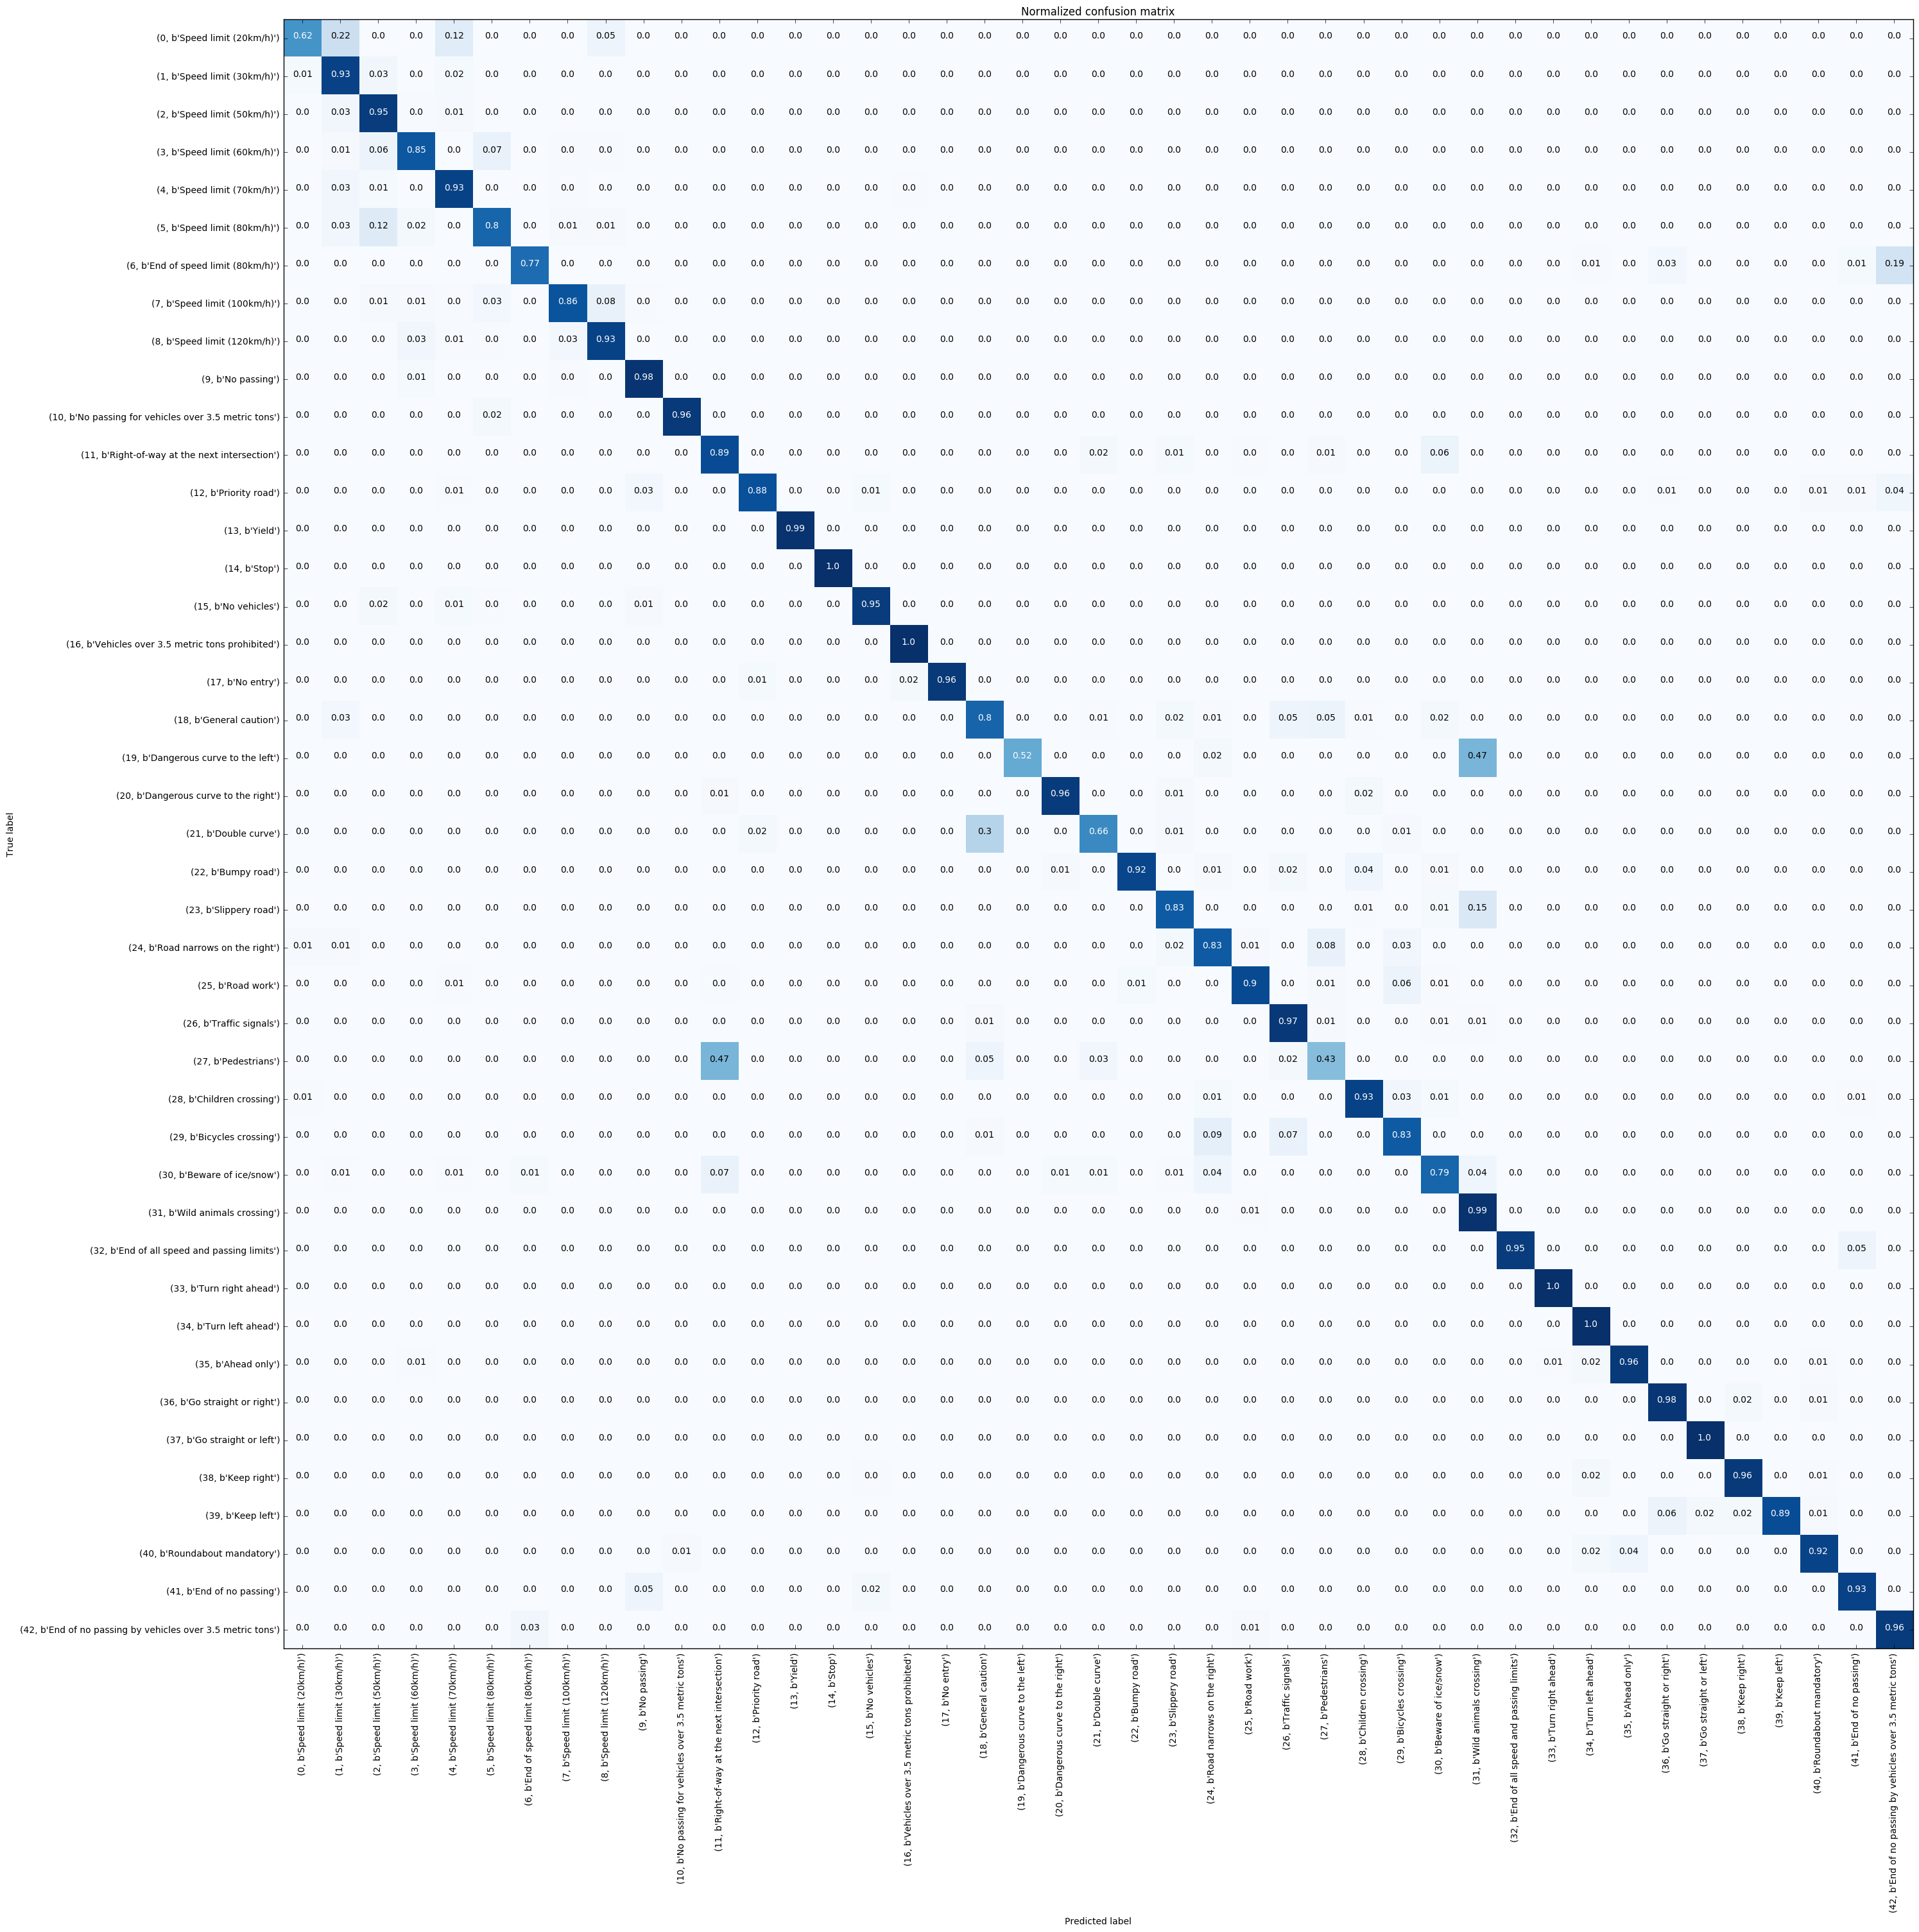

In [29]:
from project_lib import utils


# Compute confusion matrix
cnf_matrix = utils.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plt.figure(figsize=(30,30))
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

As have seen, my initial architecture, based on **LeNet**, was overfitting (difference between training error and validation error) despite providing more data and using dropout as a regularization technique.
I took the decision the decision to change the model architecture and I chose to implement the "stem" part of Inception-v4 (2016) architecture from Google. 
https://arxiv.org/pdf/1602.07261v2.pdf

https://culurciello.github.io/tech/2016/06/04/nets.html

I only used the stem of the Network given the small 2D tensor we use for this dataset (32x32) compared to ILSVRC dataset (299x299) : after a number of maxpools the tensor is just too small to continue computing abstractions on top of it. You can see below that the output of the stem (stem_conv11) produces a tensor where its shape is (?, 5, 5, 192). At this stage I only one last convolution to reduce the number of pixels in order reduce the number of multiplies for the head I added on top of the stem. My head is essentially a fully connected layer whose input is ReLu-ed and output is calculated to be one-hot encoding for the labels. 
An important factor in the architecture is the addition of a Batch-Normalization layer. Has helped improving by 2 points of percentage my test accuracy.
Paper on Batch Normalization (BN) [https://arxiv.org/abs/1502.03167]
I used the Tensorflow BN implementation I used the source proposed on : http://r2rt.com/implementing-batch-normalization-in-tensorflow.html

<img src="inception-v4-stem-arch.png" alt="architecture">

<img src="Inception-inspired-arch.png" alt="architecture">

In [30]:
class Inception(MyNet):
    def __init__(self):
        super().__init__()
        # Hyperparameters
        self.alpha = 1e-3
        self.epsilon = 1e-3
        
    def batch_norm_is_training(self, inputs, scale, beta, pop_mean, pop_var,
                               decay = 0.99, name='batch_norm'):
        name_op = name
        batch_mean, batch_var = tf.nn.moments(inputs,[0], name=name_op+'_moment')
        train_mean = tf.assign(pop_mean,
                               pop_mean * decay + batch_mean * (1 - decay))
        train_var = tf.assign(pop_var,
                              pop_var * decay + batch_var * (1 - decay))
        with tf.control_dependencies([train_mean, train_var]):
            return tf.nn.batch_normalization(inputs,
                batch_mean, batch_var, beta, scale, self.epsilon, name=name_op+'_bn')
        return inputs
        
    
    def batch_norm_is_not_training(self, inputs, scale, beta, pop_mean, pop_var,
                                   decay = 0.99, name='batch_norm'):
        name_op = name
        return tf.nn.batch_normalization(inputs,
                pop_mean, pop_var, beta, scale, self.epsilon, name=name_op+'_bn')
        

    def batch_norm_wrapper(self, inputs, is_training, decay = 0.99, name='batch_norm'):
        name_op = name
        scale = tf.Variable(tf.ones([inputs.get_shape()[-1]]), name=name_op + 'scale')
        beta = tf.Variable(tf.zeros([inputs.get_shape()[-1]]), name=name_op + 'scale')
        pop_mean = tf.Variable(tf.zeros([inputs.get_shape()[-1]]), trainable=False, name= name_op + 'pop_mean')
        pop_var = tf.Variable(tf.ones([inputs.get_shape()[-1]]), trainable=False, name= name_op + 'pop_var')
        return tf.cond(is_training, 
                       lambda:self.batch_norm_is_training(inputs, scale, beta, pop_mean, pop_var),
                       lambda:self.batch_norm_is_not_training(inputs, scale, beta, pop_mean, pop_var) )

    # Implementing the Stem of the Inception-v4 network
    def build_stem(self,x):
        out = self.conv2d(x, kernel=[3, 3], depth=32, strides=1, layer_name='stem_conv1', padding='VALID')
        out = self.conv2d(out, kernel=[3, 3], depth=32, strides=1, layer_name='stem_conv2', padding='VALID')
        out_fork = self.conv2d(out, kernel=[3, 3], depth=64, strides=1, layer_name='stem_conv3')

        out_fork1 = self.conv2d(out_fork, kernel=[3, 3], depth=96, strides=2, layer_name='stem_conv4', padding='VALID')

        pool_filter_shape = [1, 3, 3, 1]
        pool_strides = [1, 2, 2, 1]
        pooling_layer1 = tf.nn.max_pool(out_fork, pool_filter_shape, pool_strides,
                                        padding = 'VALID')

        # Filter concat
        out_concat1 = tf.concat(3, [out_fork1, pooling_layer1])

        # Short path
        out_fork2_short = self.conv2d(out_concat1, kernel=[1, 1], depth=64, layer_name='stem_conv5')
        out_fork2_short = self.conv2d(out_fork2_short, kernel=[3, 3], depth=96, layer_name='stem_conv6', padding='VALID')
        
        # Long path
        out_fork2_long = self.conv2d(out_concat1, kernel=[1, 1], depth=64, layer_name='stem_conv7')
        out_fork2_long = self.conv2d(out_fork2_long, kernel=[7, 1], depth=64, layer_name='stem_conv8')
        out_fork2_long = self.conv2d(out_fork2_long, kernel=[1, 7], depth=64, layer_name='stem_conv9')
        out_fork2_long = self.conv2d(out_fork2_long, kernel=[3, 3], depth=96, layer_name='stem_conv10', padding='VALID')

        # Filter concat
        out_concat2 = tf.concat(3, [out_fork2_short, out_fork2_long])

        out_fork_last_conv = self.conv2d(out_concat2, kernel=[3, 3], depth=192, strides=2, layer_name='stem_conv11', padding='VALID')

        pool_filter_shape = [1, 2, 2, 1]
        pool_strides = [1, 2, 2, 1]
        pooling_layer2 = tf.nn.max_pool(out_concat2, pool_filter_shape, pool_strides,
                                        padding = 'VALID')

        # Filter concat
        out_stem = tf.concat(3, [out_fork_last_conv, pooling_layer2])

        return out_stem

    def build_head(self, x, is_training, dropout=1.0):
        # TODO: Layer 5: Fully Connected. Input = 5x5x384. Flattened = 9600.
        stem = self.build_stem(x)
        print('Layer out of stem shape:', stem.get_shape())
        
        # Extra convolution to reduce size and 
        stem = self.conv2d(stem, kernel=[3, 3], depth=stem.get_shape()[-1].value, strides=2,
                           layer_name='head_out_conv', padding='VALID')
        """conv = tf.contrib.layers.convolution2d(inputs=x,
            num_outputs = stem.get_shape()[-1].value, # 384
            kernel_size = [3, 3], #[kernel_height, kernel_width]
            stride = [2,2],
            padding='VALID',
            activation_fn=None,
            normalizer_fn=tf.contrib.layers.batch_norm,
            normalizer_params=None,
            weights_initializer=tf.contrib.layers.xavier_initializer(dtype=tf.float32),
            biases_initializer=tf.zeros_initializer,
            trainable=True,
            scope='stem_cnn') """
        out_stem = tf.contrib.layers.flatten(stem)
        print('Layer out of stem flat shape:', out_stem.get_shape())
        full_layer = out_stem
        
        # Activation
        full_layer = tf.maximum(self.alpha*full_layer,full_layer)
        full_layer = tf.nn.dropout(full_layer, dropout)
        
        #  Batch normalization
        full_layer = self.batch_norm_wrapper(full_layer, is_training)
        # In the future this instead https://github.com/tensorflow/tensorflow/blob/b826b79718e3e93148c3545e7aa3f90891744cc0/tensorflow/contrib/layers/python/layers/layers.py#L100
        #full_layer = tf.contrib.layers.batch_norm(full_layer, center=True, scale=False, is_training=is_training, scope="BNorm")
        
        # Layer 5: Fully Connected. Input = 9600. Output = 43.
        full_layer = self.fully_connected(full_layer, 43, layer_name='layer5')
        print('Layer 5 shape:', full_layer.get_shape())

        logits = full_layer
        return logits

    def build(self, x, is_training, dropout=1.0):
        return self.build_head(x, is_training, dropout)

# Initialize Network
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

net = Inception()

is_training = tf.placeholder(tf.bool, shape=[], name="is_training")
logits = net.build(x, is_training, keep_prob)


softmax_out = tf.nn.softmax(logits)
top_5_out = tf.nn.top_k(softmax_out, k=5)

label_index = tf.argmax(logits, axis=1, name='calculatedLabel', dimension=None)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

Layer out of  stem_conv1 shape, (?, 30, 30, 32)
Layer out of  stem_conv2 shape, (?, 28, 28, 32)
Layer out of  stem_conv3 shape, (?, 28, 28, 64)
Layer out of  stem_conv4 shape, (?, 13, 13, 96)
Layer out of  stem_conv5 shape, (?, 13, 13, 64)
Layer out of  stem_conv6 shape, (?, 11, 11, 96)
Layer out of  stem_conv7 shape, (?, 13, 13, 64)
Layer out of  stem_conv8 shape, (?, 13, 13, 64)
Layer out of  stem_conv9 shape, (?, 13, 13, 64)
Layer out of  stem_conv10 shape, (?, 11, 11, 96)
Layer out of  stem_conv11 shape, (?, 5, 5, 192)
Layer out of stem shape: (?, 5, 5, 384)
Layer out of  head_out_conv shape, (?, 2, 2, 384)
Layer out of stem flat shape: (?, 1536)
Layer 5 shape: (?, 43)


In [31]:
# Preparing optimization

rate = 0.00015
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [32]:
# Train the neural network

dropout = 0.25
EPOCHS = 100
BATCH_SIZE = 256
is_training_val = True
#%time 
saved_model, incep_training_accuracies, incep_valid_accuracies = train('inception-v4-stem.ckpt', training_operation, accuracy_operation, X_train, y_train, X_validation, y_validation, EPOCHS, BATCH_SIZE, dropout, is_training_val)  


Training...
EPOCH 1:  Training Accuracy = 0.519,  Validation Accuracy = 0.520
EPOCH 2:  Training Accuracy = 0.768,  Validation Accuracy = 0.766
EPOCH 3:  Training Accuracy = 0.865,  Validation Accuracy = 0.860
EPOCH 4:  Training Accuracy = 0.909,  Validation Accuracy = 0.905
EPOCH 5:  Training Accuracy = 0.934,  Validation Accuracy = 0.927
EPOCH 6:  Training Accuracy = 0.948,  Validation Accuracy = 0.940
EPOCH 7:  Training Accuracy = 0.959,  Validation Accuracy = 0.952
EPOCH 8:  Training Accuracy = 0.966,  Validation Accuracy = 0.959
EPOCH 9:  Training Accuracy = 0.968,  Validation Accuracy = 0.960
EPOCH 10:  Training Accuracy = 0.976,  Validation Accuracy = 0.968
EPOCH 11:  Training Accuracy = 0.979,  Validation Accuracy = 0.973
EPOCH 12:  Training Accuracy = 0.981,  Validation Accuracy = 0.975
EPOCH 13:  Training Accuracy = 0.984,  Validation Accuracy = 0.977
EPOCH 14:  Training Accuracy = 0.986,  Validation Accuracy = 0.981
EPOCH 15:  Training Accuracy = 0.986,  Validation Accuracy 

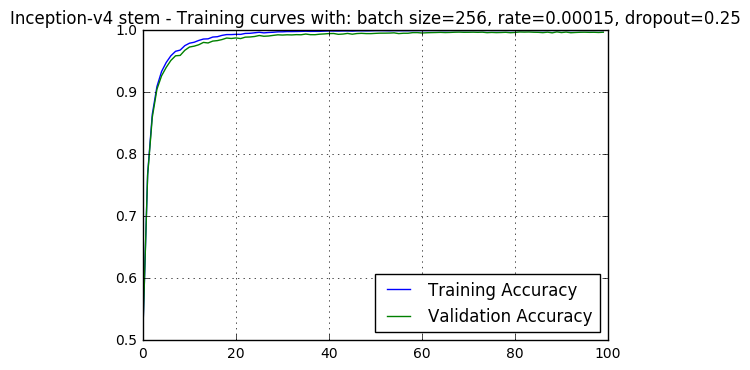

In [33]:
plt.plot(incep_training_accuracies,label='Training Accuracy')
plt.plot(incep_valid_accuracies,label='Validation Accuracy')
plt.title( 'Inception-v4 stem - Training curves with: batch size={}, rate={}, dropout={}'.format(BATCH_SIZE, rate, dropout) )
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [34]:
# Evaluate the model

with tf.Session() as sess:
    dropout = 1
    saver = tf.train.Saver()
    saver.restore(sess, saved_model)
    
    test_accuracy = evaluate(accuracy_operation, X_test, y_test, BATCH_SIZE)
    print("Test Accuracy = {:.1f}% on {} examples".format(test_accuracy*100,len(y_test)))


Test Accuracy = 97.6% on 12630 examples


Normalized confusion matrix
[[ 0.97  0.    0.   ...,  0.    0.    0.  ]
 [ 0.    1.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.99 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  1.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    1.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    1.  ]]


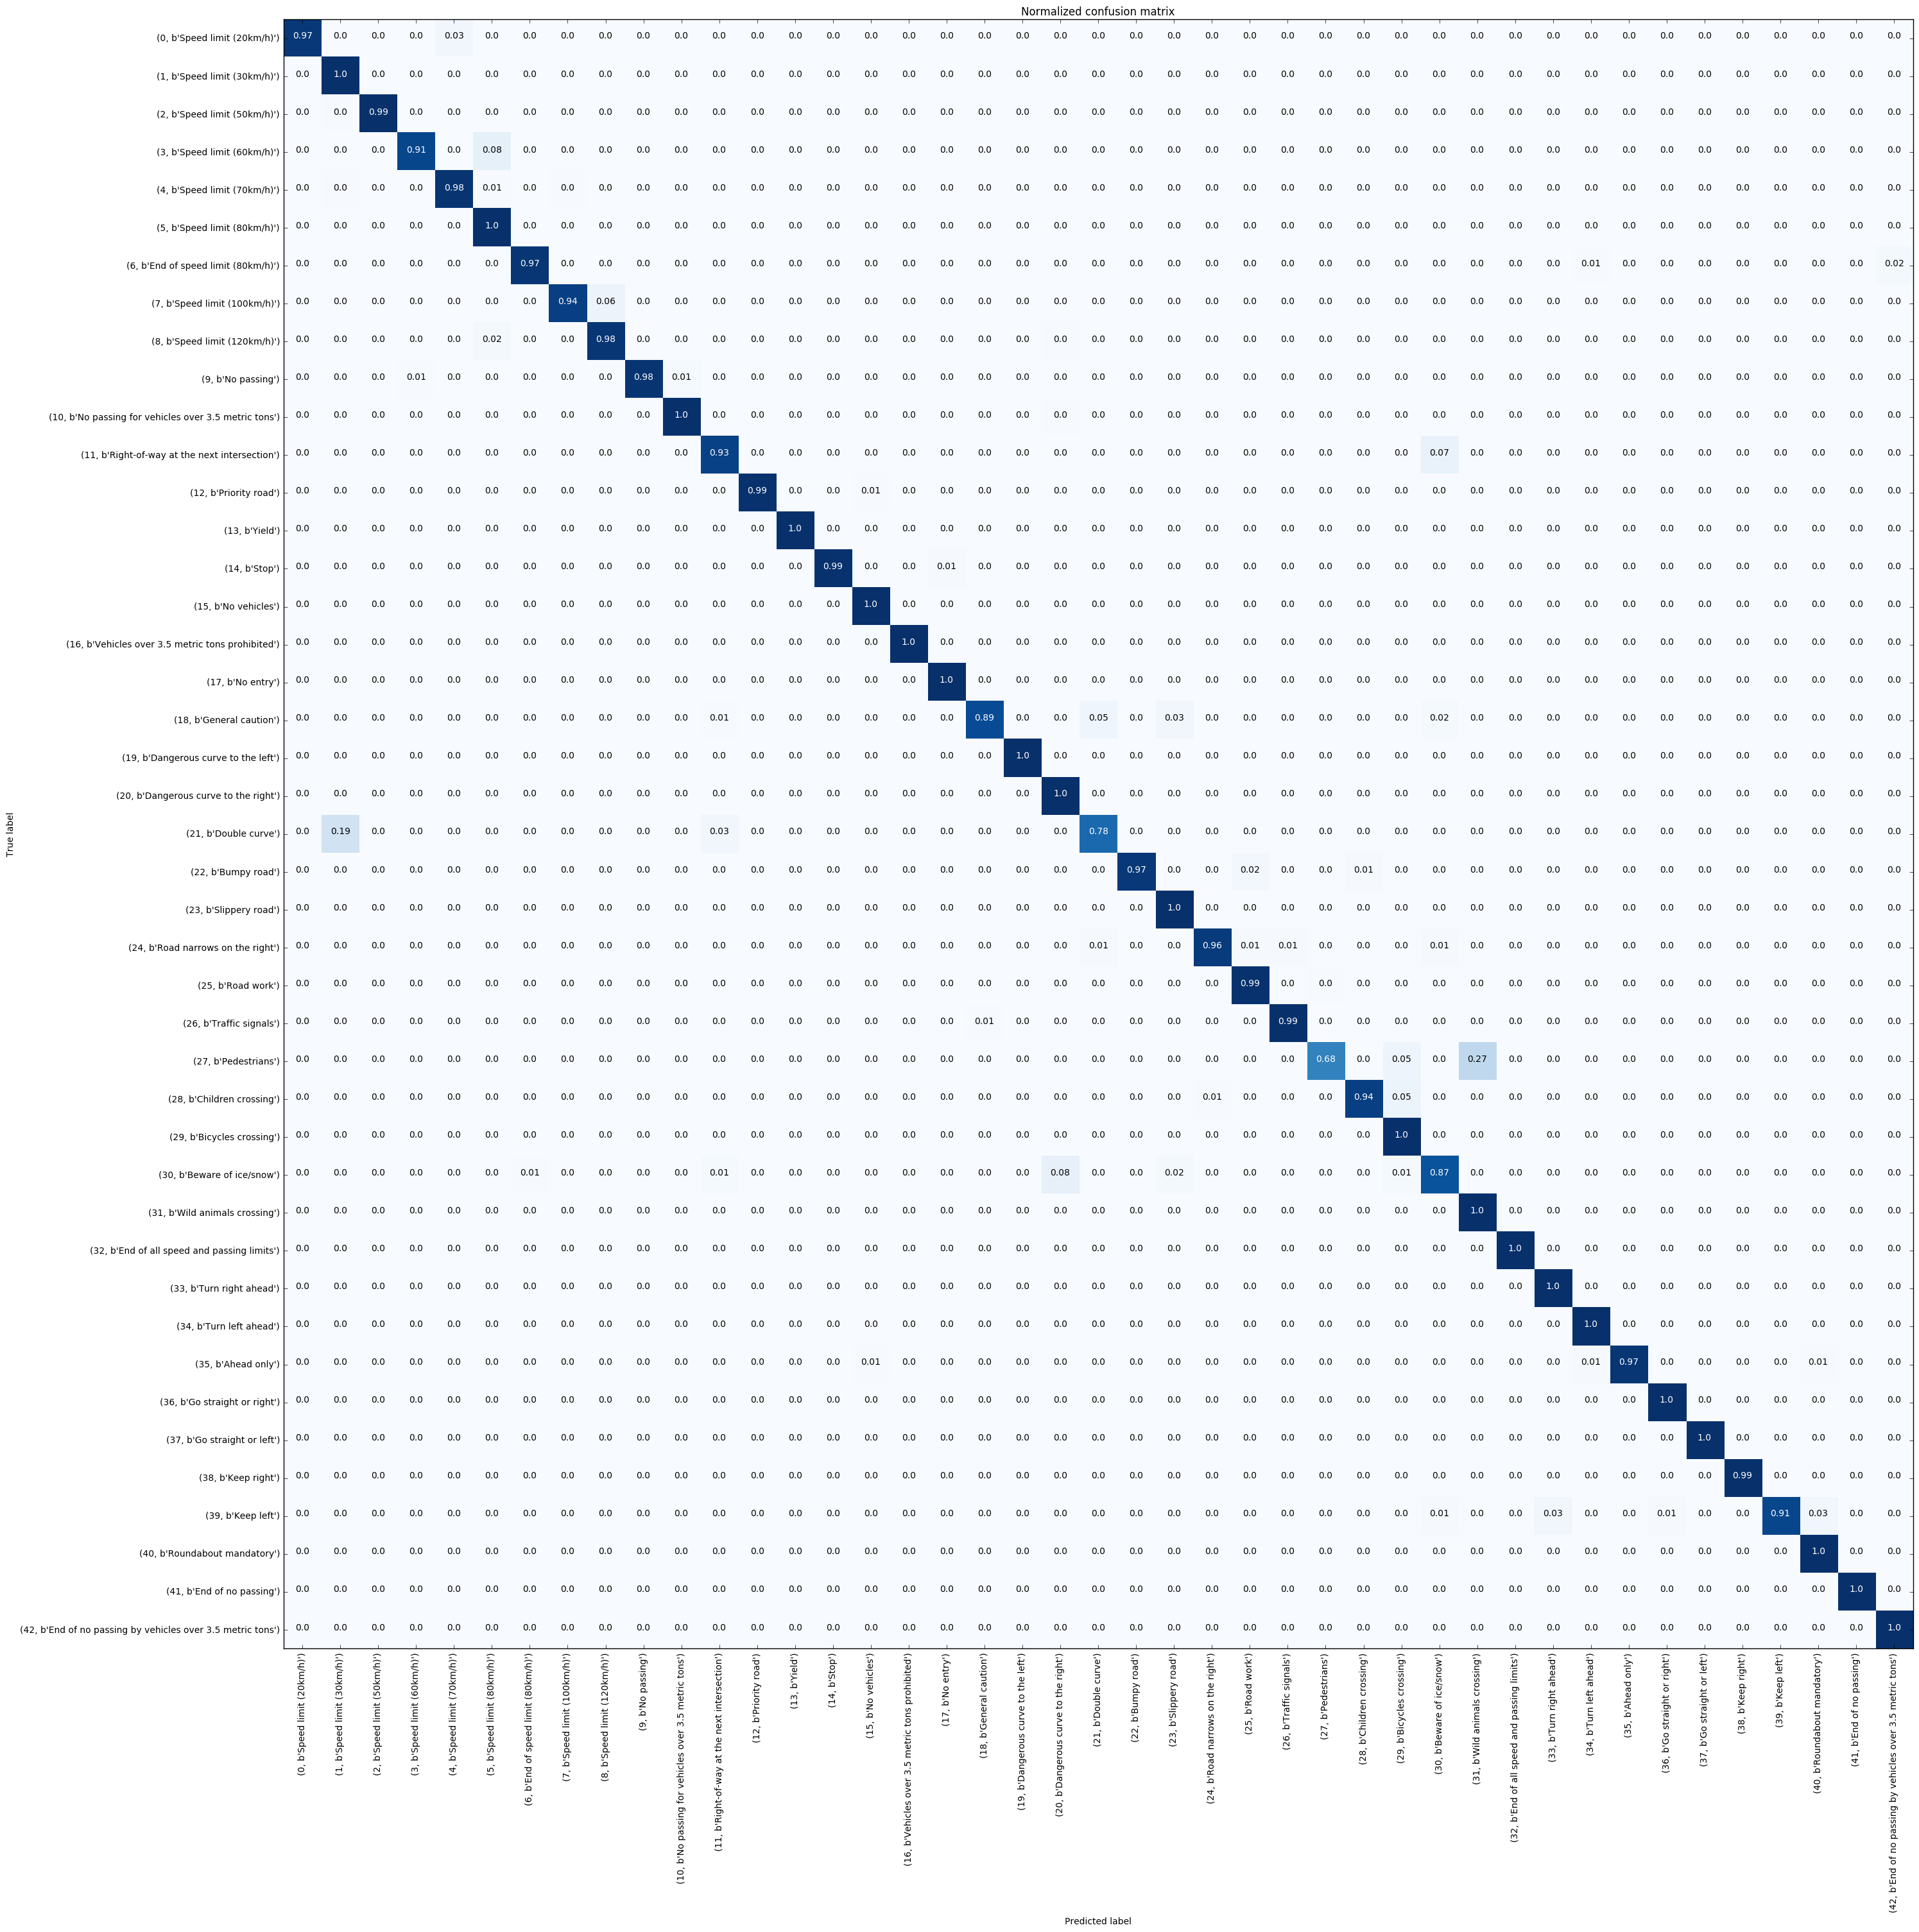

In [35]:

# Calculate preditions on test set
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, saved_model)
    is_training_val = False
    y_pred = classifier(sess, label_index, X_test, y_test, BATCH_SIZE, is_training_val)

        # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plt.figure(figsize=(30,30))
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Trying with some random images
Label: No passing
Classified as: No passing


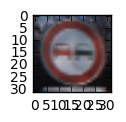

Label: General caution
Classified as: General caution


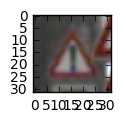

Label: No passing
Classified as: No passing


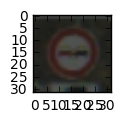

In [36]:
import random

print('Trying with some random images')

with tf.Session() as sess:
    dropout = 1
    saver = tf.train.Saver()
    saver.restore(sess, saved_model)
    for i in range(3):
        index = random.randint(0, len(X_test))
        print('Label:', labels[y_test[index]][1].decode('UTF-8'))
        image = X_test[index].squeeze()
        idx = sess.run(label_index, feed_dict={x: image.reshape(1, 32,32,3) , is_training : False,  keep_prob: dropout})  
        print('Classified as:',  labels[idx][0][1].decode('UTF-8'))
        image = cv2.cvtColor(np.uint8(np.clip(image*255+128, 0, 255)),
                             cv2.COLOR_YUV2RGB)
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        plt.show()

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:**

According to the paper "An overview of gradient descent optimization algorithms" by Sebastian Ruder, the **Adam optimizer** is a great choice as the learning rate is adaptative. 
https://arxiv.org/pdf/1609.04747v1.pdf

I chose a dropout rate of 50%, 100 EPOCHS (Google's epoch number is 200 in their paper for Inception-v4 but their network is much bigger).  In addition, I chose BATCH_SIZE = 256.

Training my model with these hyper-parameters takes a bit more than an hour.
My machine's configuration is an Intel i7, 16GB RAM, 16GB swap, NVIDIA 1070GTX.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I noticed the test accuracy was too low even when applied a regularization technique (dropout).
So, I followed the method suggested by Andrew Ng in his talk "Nuts and Bolts of Applying Deep Learning (YouTube)":
- log validation accuracy and training accuracy curves for each major changes in my approach
- use the those learning curves to assess whether the model has a high variance problem (over-fitting) or a low-variance problem (underfitting)

Very early in the process my validation accurracy was not very high (around 91% test accuracy). I hoped identifying the challenging images from the validation dataset and possibly generate more training examples, without unbalancing the training dataset.
Finally I tried a different architecture and obtained more satisfying results (around 96% test accuracy).

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

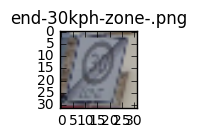

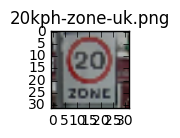

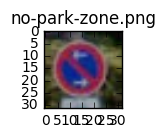

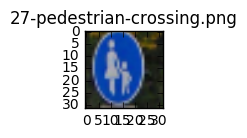

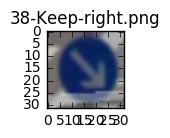

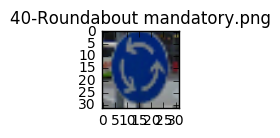

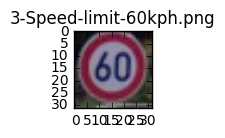

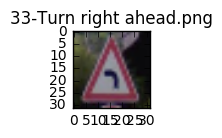

In [70]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Most images where collected on Google Street view in Stuttgart (Germany). 
# Just one image was collected from a street in the UK (20mph zone).
import cv2
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt

image_list = list()
image_name_list = list()
for file in os.listdir('./my_traffic_signs/'):
    if file.endswith('.png'):
        image_name_list.append(file)
        

for image_name in image_name_list:
    # Import image to notebook
    image = cv2.resize(mpimg.imread('./my_traffic_signs/'+image_name),(32, 32))
    
    # Denormalize image to get pixel values from 0 to 255 (I like that)
    image = (image * 255).astype(np.uint8)
    image_list.append(image)
    plt.figure(figsize=(1,1))
    plt.imshow(image_list[-1])
    plt.title(image_name)
    plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

From my the Confusion Matrix calculated above (open the confusion matrix in another tab), we could infer which classes happen achieve the lowest accuracy in the test dataset.

- 3-Speed-limit-60kph : 95% accuracy
- 20 km/h zone (UK sign): No equivalent in the training dataset, but close to the 20 km/h sign (98% accuracy)
- No parking zone :  No equivalent in the training dataset
- 27-pedestrian-crossing.png : No equivalent in the training dataset
- 38-Keep-right.png : 99 %
- 33-Turn right ahead.png : 100 % accuracy
- 40-Roundabout mandatory.png : 98 % 
- end-30kph-zone-.png : No equivalent in the training dataset

The biggest challenge in my case is that some images are ** not part of the training dataset ** (20 km/h zone, No parking zone, end-30kph-zone-.png, 27-pedestrian-crossing.png).

A second challenge would be related to the quality of the training on the neural network: we can see that the pedestrian crossing has the lowest accuracy score on the test dataset.

An additional challenge would be due to the quality of some of the images : the image 38-Keep-right.png has a transparent artifact at the bottom of the image. This could make the classification more difficult.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [185]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import numpy as np


Trying with my images (retrieved from the web)
Classified as: Roundabout mandatory  with a probability of 95.7%


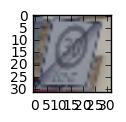

Classified as: Speed limit (20km/h)  with a probability of 73.2%


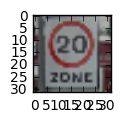

Classified as: Keep right  with a probability of 96.4%


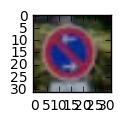

Classified as: Turn left ahead  with a probability of 99.9%


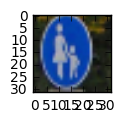

Classified as: Keep right  with a probability of 100.0%


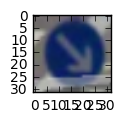

Classified as: Roundabout mandatory  with a probability of 100.0%


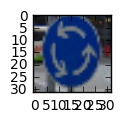

Classified as: Speed limit (60km/h)  with a probability of 100.0%


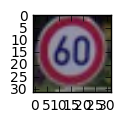

Classified as: Dangerous curve to the left  with a probability of 100.0%


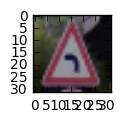

In [158]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

print('Trying with my images (retrieved from the web)')

# tf.reset_default_graph()

with tf.Session() as sess:
    dropout = np.float32(1.0)
    
    
    #saver = tf.train.Saver()
    
    #saver =tf.train.import_meta_graph('./inception-v4-stem.ckpt.meta')
    saver.restore(sess, saved_model)
    #saver.restore(sess, './inception-v4-stem.ckpt')

    for image in image_list:
        image_yuv = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_RGB2YUV)
        image_norm = np.float32((np.float32(image_yuv)-128.0)/255.0)
        
        feed_dict_val={x: image_norm.reshape(1,32,32,3), is_training: False, keep_prob: 1.} 
        softmax_val, idx = sess.run([softmax_out, label_index], feed_dict_val)
        
        # Flatten provability tensor into an array and flip content 
        softmax_val = softmax_val.ravel()
        print('Classified as: {}  with a probability of {:.1f}%'.format(labels[idx][0][1].decode('UTF-8'),
                np.max(softmax_val)*100 ) )
        plt.figure(figsize=(1,1))
        plt.imshow(cv2.cvtColor((image_norm*255+128).astype(np.uint8), cv2.COLOR_YUV2RGB))
        plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

My model is pretty certain of all predictions.
Please look at the detailled calculated probabilies results below the script at the bottom of this page.
Please note that I added signs that are **not part of the training labels** in order to see how the model would behave when facing unexpected presented signs.

So, we have the following results:
- end-30kph-zone-.png : ** False detection ** (no corresponding category in the training dataset)
- 20 km/h zone (UK sign): detected with 73% certainty as 20 km/h speed limit (No equivalent in the training dataset, but looks similar to the 20 km/h sign)
- 3-Speed-limit-60kph : **True detection** 100% certainty
- No parking zone : False detection (No equivalent in the training dataset)
- 27-pedestrian-crossing.png: False detection  (No equivalent in the training dataset: this one is round with a blue background - see below)
- 38-Keep-right.png : **True detection ** with 100% certainty
- 33-Turn right ahead.png : **True detection ** with certainty (it is actually a dangerous right turn ahead)
- 40-Roundabout mandatory.png : **True detection 100%** certainty

** Results : ** 

**4/4 : 100%** Accuracy with categories existing in the trainig set.

**4/8 : 50%** Accuracy when including 4 random signs categories that are **not present** in the training set.

It is interesting to see how well the model perfoms when it is presented categories of traffic signs it has been trained with.
However, I was expecting less certainty between the top-5 classes when presented with unkown categories. 


Get the highest probabilities with my images (retrieved from the web)


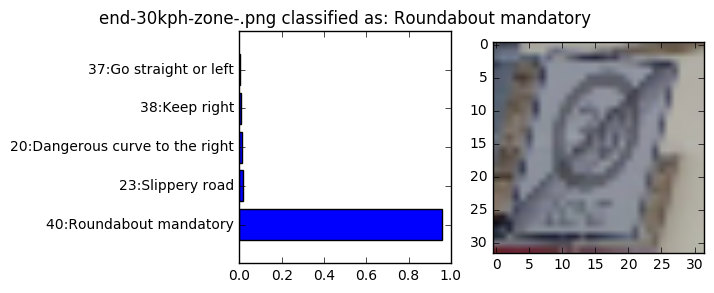

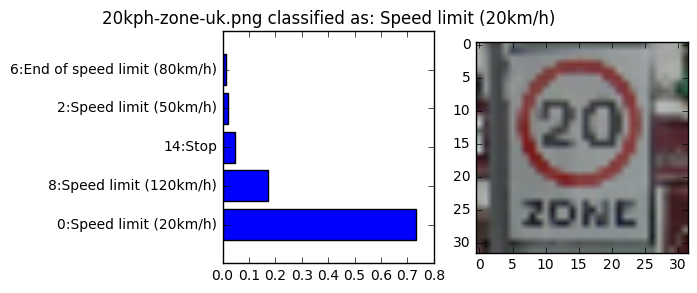

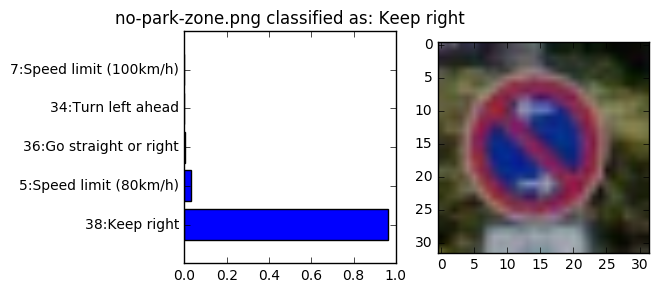

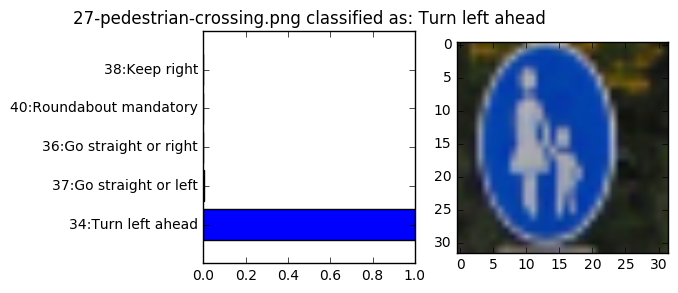

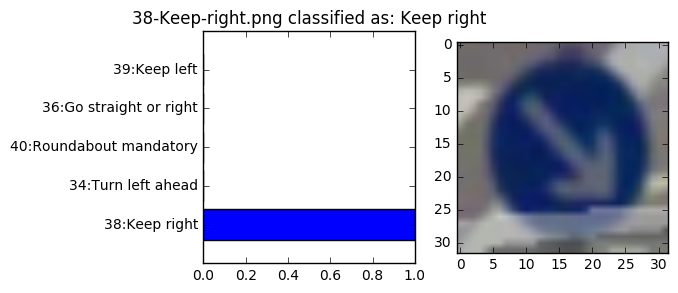

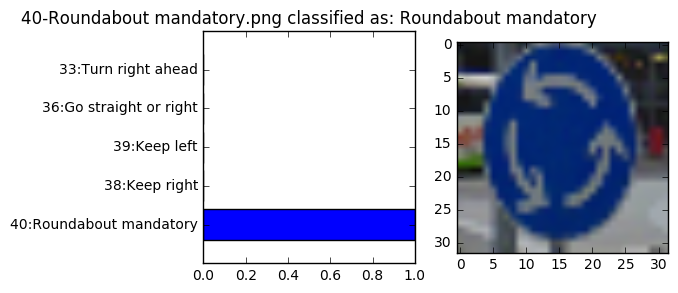

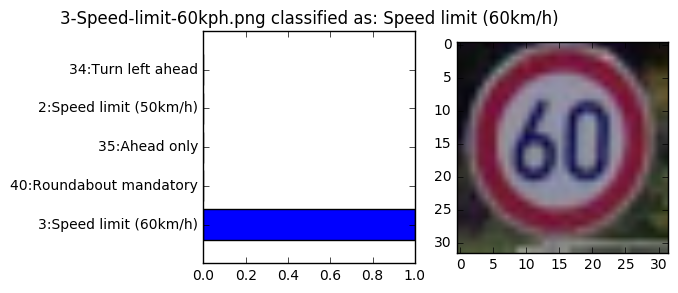

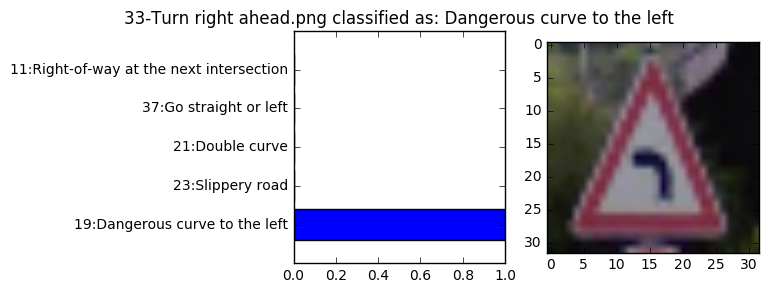

In [160]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

print('Get the highest probabilities with my images (retrieved from the web)')

# tf.reset_default_graph()

with tf.Session() as sess:
    dropout = np.float32(1.0)
    #saver = tf.train.Saver()
    
    #saver =tf.train.import_meta_graph('./inception-v4-stem.ckpt.meta')
    saver.restore(sess, saved_model)
    #saver.restore(sess, './inception-v4-stem.ckpt')
    i=0
    for image in image_list:
        image_yuv = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_RGB2YUV)
        image_norm = np.float32((np.float32(image_yuv)-128.0)/255.0)
        
        feed_dict_val={x: image_norm.reshape(1,32,32,3), is_training: False, keep_prob: 1.} 
        softmax_val, top_5_val, idx = sess.run([softmax_out, top_5_out, label_index], feed_dict_val)
        
        # Flatten provability tensor into an array and flip content 
        softmax_val = softmax_val.ravel()
        top_probs = top_5_val.values.ravel()
        top_indices = top_5_val.indices.ravel()
        plt.figure(figsize=(6,3))
        plt.subplot(1, 2, 1)
        plt.barh(range(len(top_indices)),top_probs, align='center')
        plt.yticks( np.arange(len(top_indices)), np.array(hist_xticks)[top_indices],  rotation=0 )
        plt.ylim([-1, len(top_indices)])
        plt.title('{} classified as: {}'.format(image_name_list[i], 
                                labels[idx][0][1].decode('UTF-8')) )
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor((image_norm*255+128).astype(np.uint8), cv2.COLOR_YUV2RGB))
        plt.show()
        i += 1

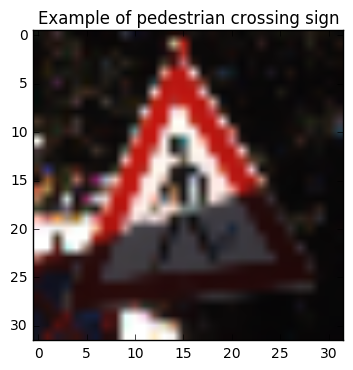

In [184]:
crossing_idx = np.where(y_test==27)[0]
crossing_id = crossing_idx[38]
plt.imshow(cv2.cvtColor((X_test[crossing_id]*255+128).astype(np.uint8), 
           cv2.COLOR_YUV2RGB))
plt.title('Example of pedestrian crossing sign')
plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.